# - Analysis of event properties to select **Graph Features** for NN model

In [1]:
from icecube import dataio, dataclasses, phys_services, simclasses
import icecube.common_variables as cv
from icecube import icetray

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', dpi=300)

from glob import glob

In [3]:
#load the files
dfiles = sorted(glob('/data/user/ssarkar/TridentProduction/simulation/datasim/resampled_numu/run01/dataset_*/L2File/*_updated.i3'))
sfiles = sorted(glob('/data/user/ssarkar/TridentProduction/simulation/datasim/resample_cc/run01/dataset_*/L2Files/*_preselection.i3'))

print (len(dfiles))
print (len(sfiles))

gfile = dataio.I3File('GeoCalibDetectorStatus_2016.57531_V0.i3.gz')
geo = gfile.pop_frame(icetray.I3Frame.Geometry)['I3Geometry']


50
50


In [15]:
t=geo.omgeo
d=t[t.keys()[0]]
d.position

I3Position(0,0,1955)

### Direct hits

In [6]:
dh_defs = cv.direct_hits.get_default_definitions()
print(type(dh_defs))
for dh_def in dh_defs:
    print (dh_def)

<class 'direct_hits.I3DirectHitsDefinitionSeries'>
I3DirectHitsDefinition(Name: "A", I3DirectHitsTimeWindow(time0 [ns]: -15, time1 [ns]: 15))
I3DirectHitsDefinition(Name: "B", I3DirectHitsTimeWindow(time0 [ns]: -15, time1 [ns]: 25))
I3DirectHitsDefinition(Name: "C", I3DirectHitsTimeWindow(time0 [ns]: -15, time1 [ns]: 75))
I3DirectHitsDefinition(Name: "D", I3DirectHitsTimeWindow(time0 [ns]: -15, time1 [ns]: 125))


In [7]:
#get the test files


dfile = dataio.I3File('/data/user/ssarkar/TridentProduction/simulation/datasim/resampled_numu/run01/dataset_01/L2File/NumuEvent_L2_D01_B1_updated.i3')
sfile = dataio.I3File('/data/user/ssarkar/TridentProduction/simulation/datasim/resample_cc/run01/dataset_01/L2Files/NumuBar_CC_L2_D01_B1_preselection.i3')

frame = dfile.pop_physics()
frame = dfile.pop_physics()

ti = -15.*icetray.I3Units.ns
tf = 15.*icetray.I3Units.ns

reco_name = 'OnlineL2_SplineMPE'
pulse_name = 'SRTInIcePulses'

minnhit = 3

dh_maps = cv.direct_hits.calculate_direct_hits(dh_defs, geo, frame[pulse_name].apply(frame),
                                              frame[reco_name])

NameError: name 'dh_defs' is not defined

In [8]:
pulses = frame['SRTInIcePulses'].apply(frame)


In [11]:
hits=pulses.get(pulses.keys()[0])
print (hits)

[[I3RecoPulse:
             Time : 9937
           Charge : 1.075
            Width : 1
            Flags : LC ATWD FADC 
], [I3RecoPulse:
             Time : 10359
           Charge : 0.675
            Width : 8
            Flags : LC ATWD FADC 
]]


In [22]:
dh_pulses = cv.direct_hits.get_direct_hits_pulse_map(dh_defs[0], geo, frame[pulse_name].apply(frame),
                                                    frame[reco_name])

In [30]:
dh1_d = []
dh2_d = []
dh3_d = []
dh4_d = []

#dfile = dataio.I3File('/data/user/ssarkar/TridentProduction/simulation/datasim/resampled_numu/run01/dataset_01/L2File/NumuEvent_L2_D01_B1_updated.i3')
for infile in dfiles:
    dfile = dataio.I3File(infile)
    while dfile.more():
        dfile.pop_physics()
        frame = dfile.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        dh_maps = cv.direct_hits.calculate_direct_hits(dh_defs, geo, pulses, reco)
        dh1_d.append(dh_maps['A'].n_dir_doms)
        dh2_d.append(dh_maps['B'].n_dir_doms)
        dh3_d.append(dh_maps['C'].n_dir_doms)
        dh4_d.append(dh_maps['D'].n_dir_doms)

In [34]:
dh1_s = []
dh2_s = []
dh3_s = []
dh4_s = []

#dfile = dataio.I3File('/data/user/ssarkar/TridentProduction/simulation/datasim/resampled_numu/run01/dataset_01/L2File/NumuEvent_L2_D01_B1_updated.i3')
for infile in sfiles:
    dfile = dataio.I3File(infile)
    while dfile.more():
        dfile.pop_physics()
        frame = dfile.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        dh_maps = cv.direct_hits.calculate_direct_hits(dh_defs, geo, pulses, reco)
        dh1_s.append(dh_maps['A'].n_dir_doms)
        dh2_s.append(dh_maps['B'].n_dir_doms)
        dh3_s.append(dh_maps['C'].n_dir_doms)
        dh4_s.append(dh_maps['D'].n_dir_doms)

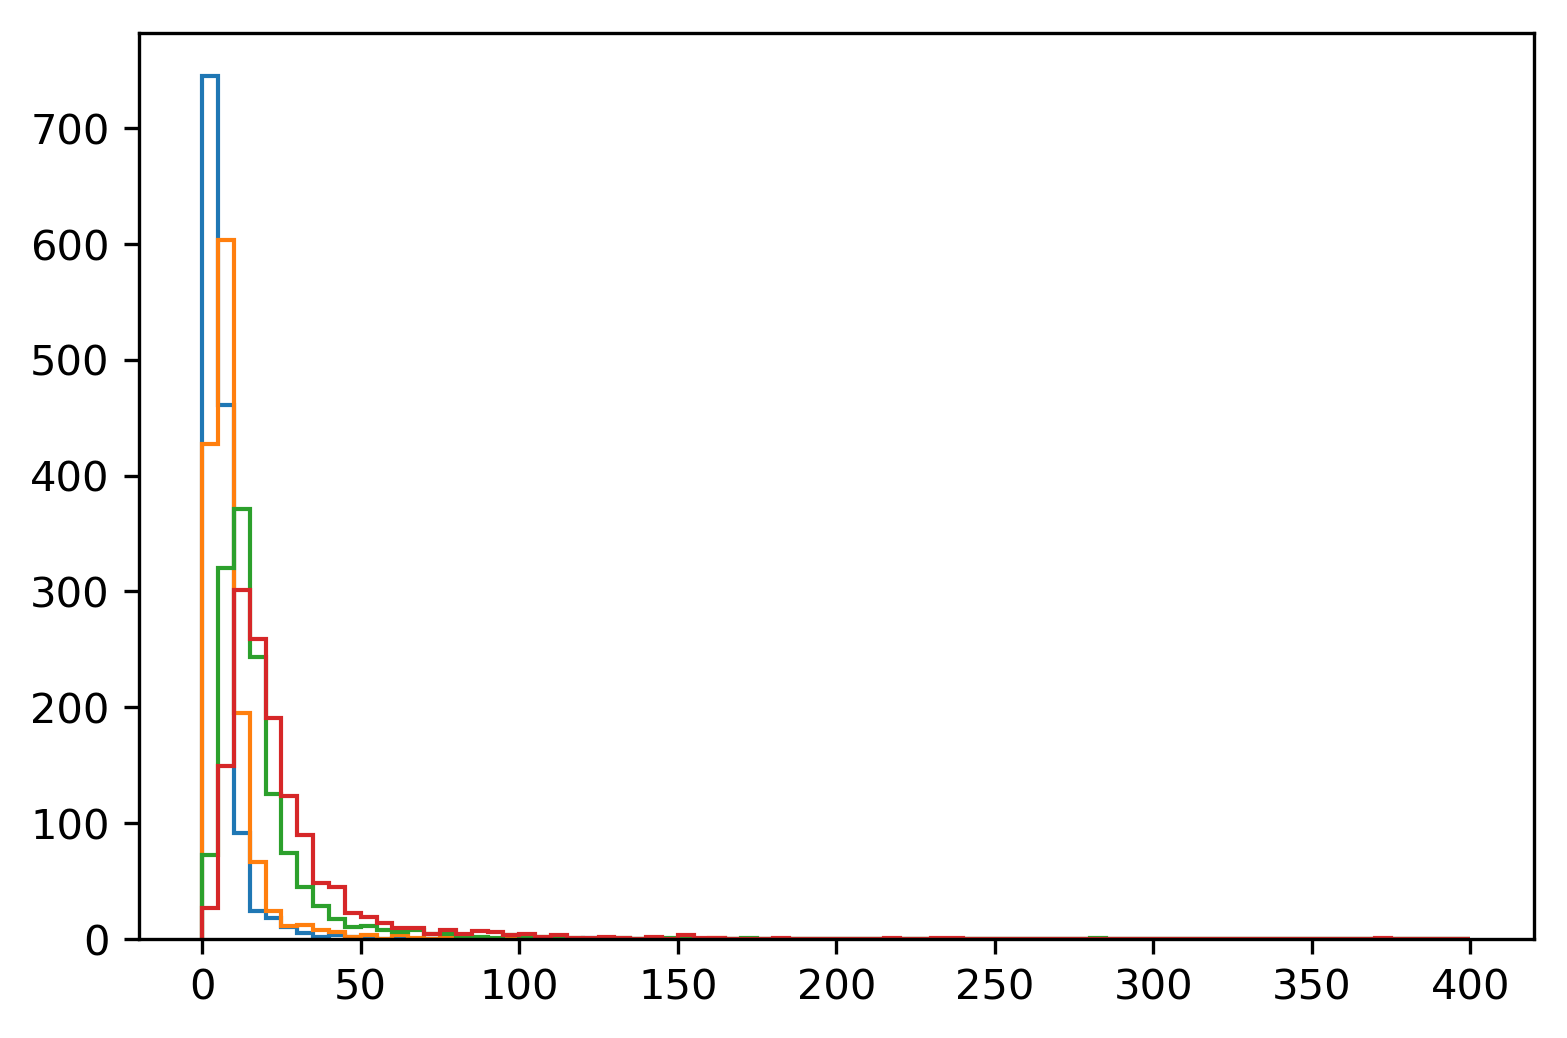

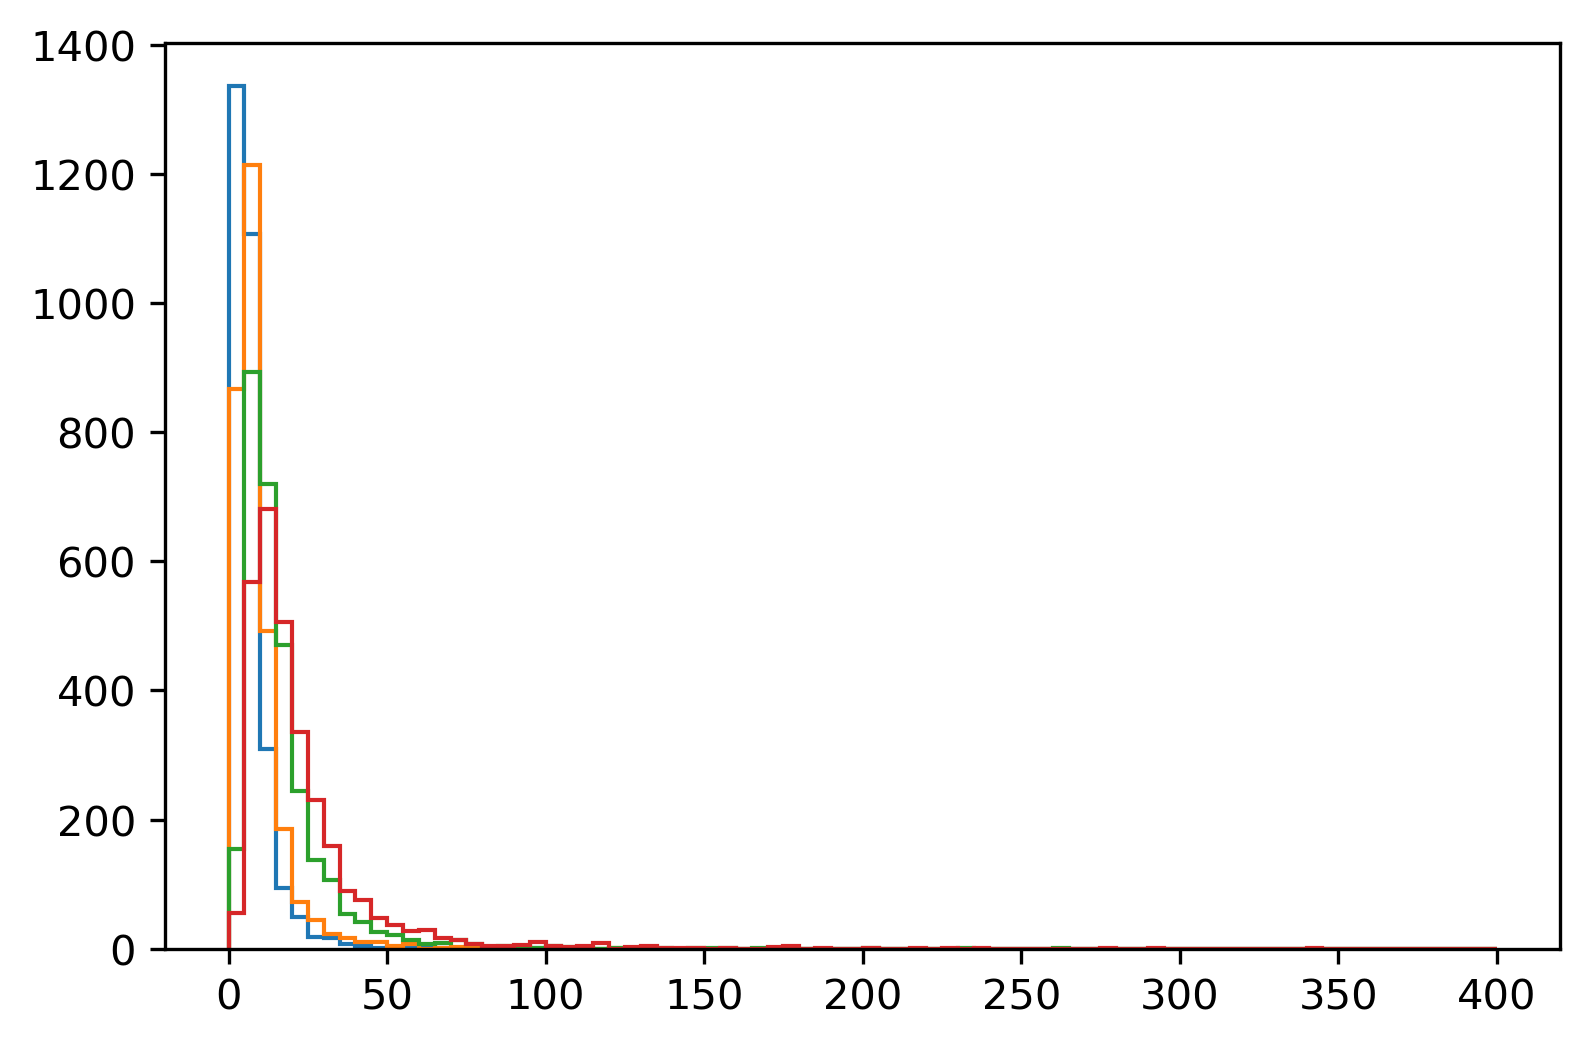

In [35]:
nbin = np.linspace(0,400, 81)
plt.figure()
plt.hist(dh1_d, bins=nbin, histtype='step')
plt.hist(dh2_d, bins=nbin, histtype='step')
plt.hist(dh3_d, bins=nbin, histtype='step')
plt.hist(dh4_d, bins=nbin, histtype='step')

plt.show()

plt.figure()
plt.hist(dh1_s, bins=nbin, histtype='step')
plt.hist(dh2_s, bins=nbin, histtype='step')
plt.hist(dh3_s, bins=nbin, histtype='step')
plt.hist(dh4_s, bins=nbin, histtype='step')

plt.show()

* ### Track Characteristics

In [48]:
def track_prop(geo, frame):
    tvalues = cv.track_characteristics.calculate_track_characteristics(geo,
                                            frame['SRTInIcePulses'].apply(frame), frame['OnlineL2_SplineMPE'], 1000.*icetray.I3Units.m)
    return (tvalues.track_hits_distribution_smoothness, tvalues.avg_dom_dist_q_tot_dom)

In [58]:
strack_p1 = []
strack_p2 = []

for infile in sfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        p1, p2 = track_prop(geo, frame)
        strack_p1.append(abs(p1))
        strack_p2.append(p2)

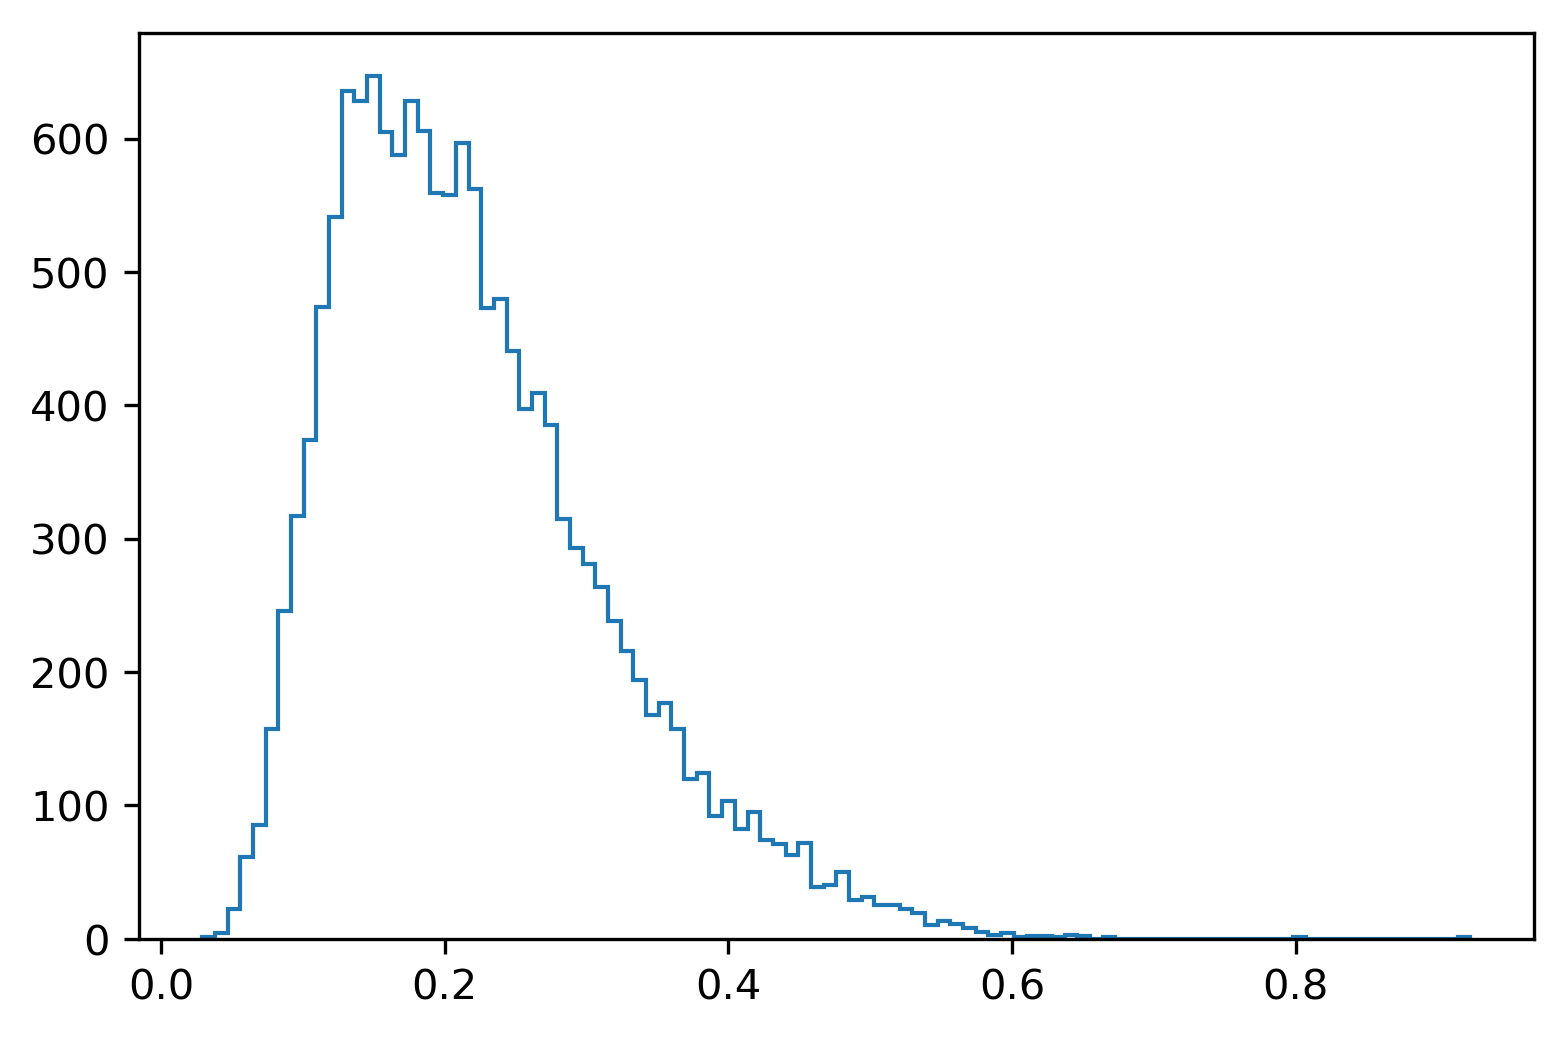

In [59]:
plt.figure()
plt.hist(strack_p1, bins=100, histtype='step')
plt.show()

In [60]:
dtrack_p1 = []
dtrack_p2 = []

for infile in dfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        p1, p2 = track_prop(geo, frame)
        dtrack_p1.append(abs(p1))
        dtrack_p2.append(p2)

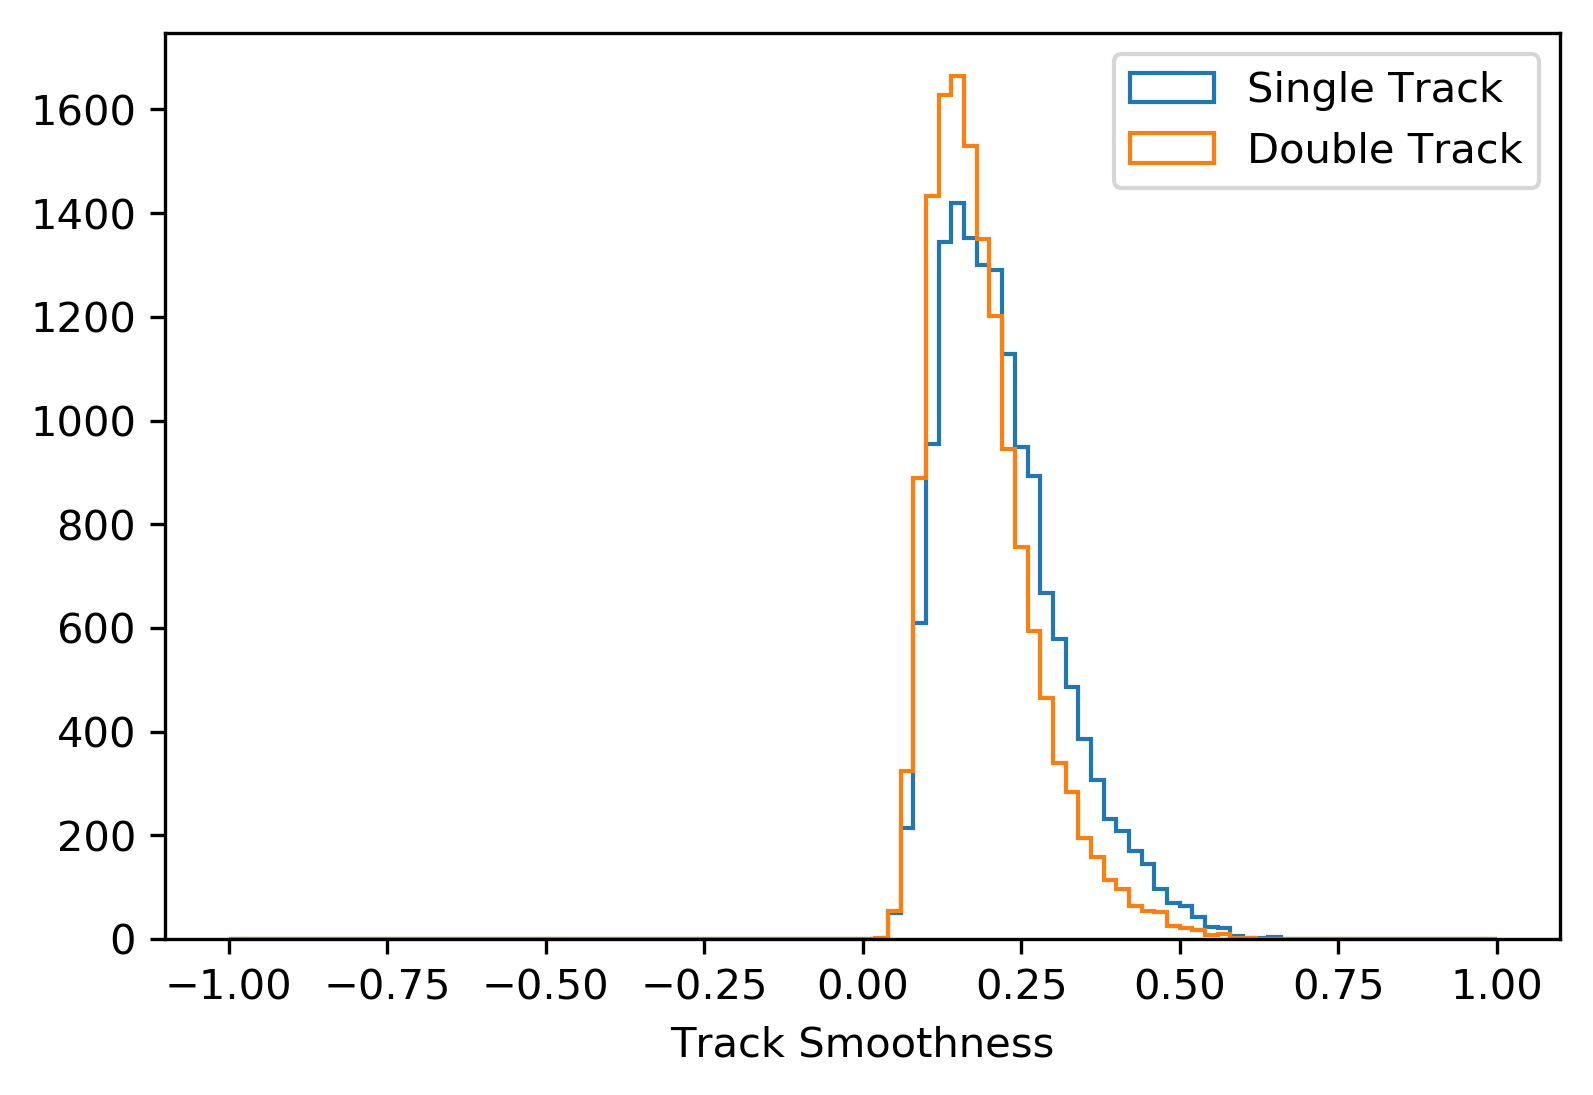

In [61]:
sbin = np.linspace(-1, 1, 101)
plt.figure()
plt.hist(strack_p1, bins=sbin, histtype='step', label='Single Track')
plt.hist(dtrack_p1, bins=sbin, histtype='step', label='Double Track')
plt.legend()
plt.xlabel('Track Smoothness')
plt.show()

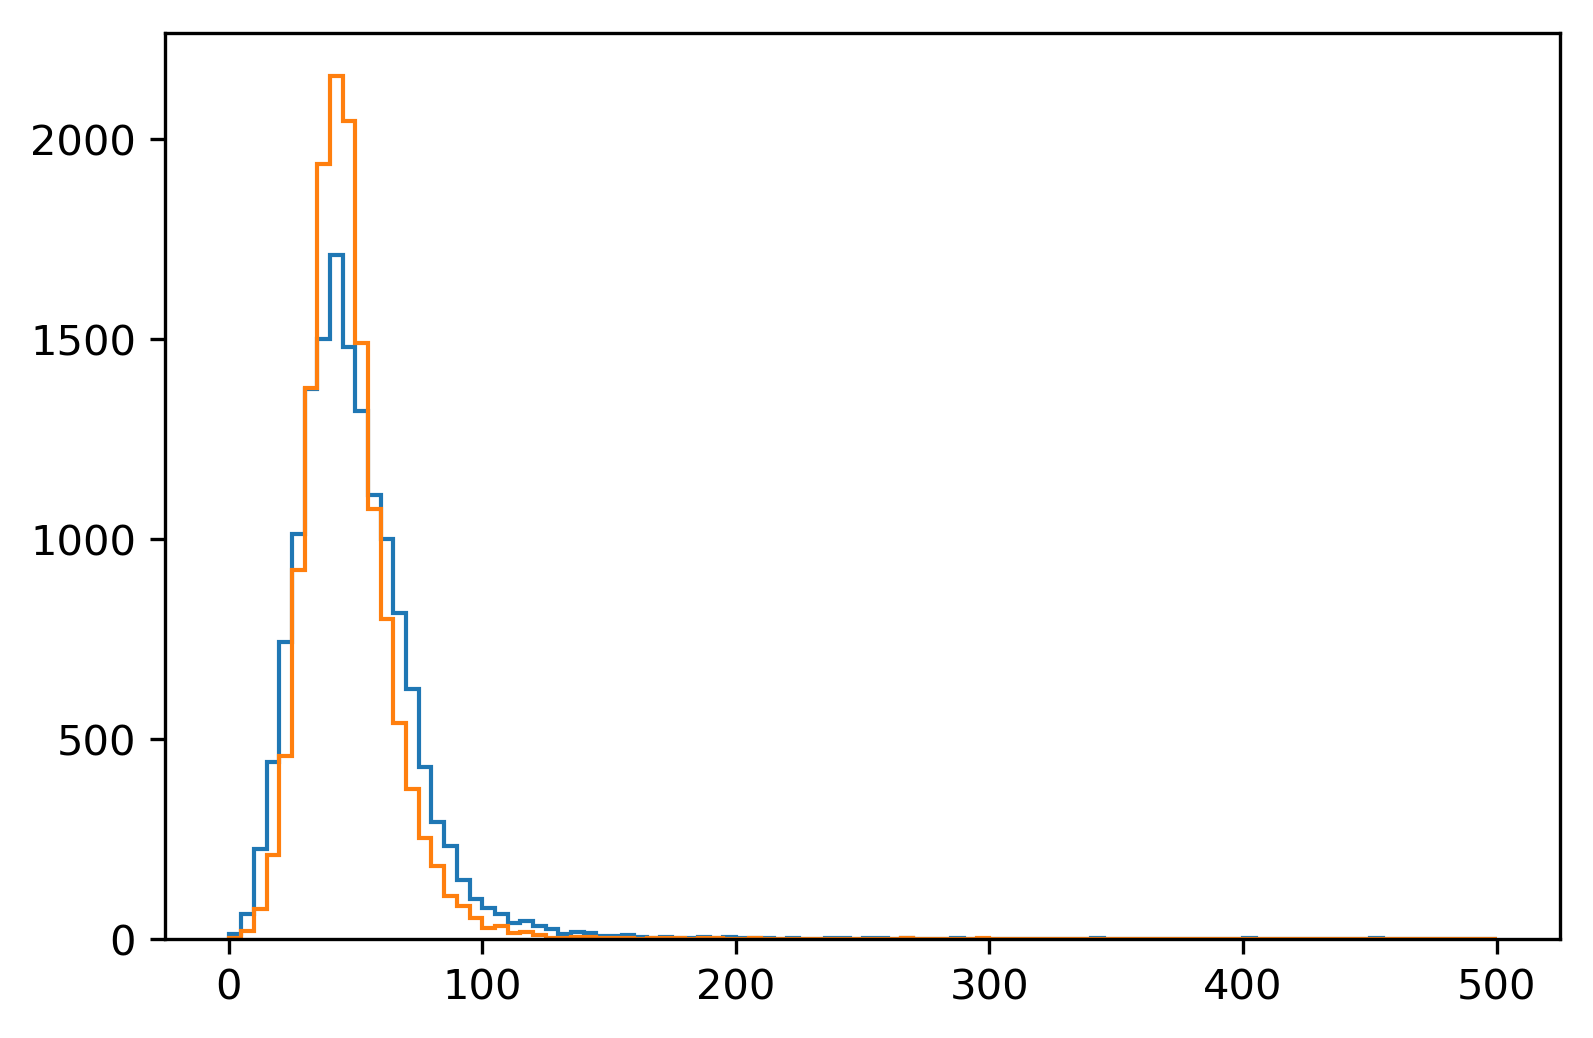

In [57]:
dbin = np.linspace(0,500, 101)

plt.figure()
plt.hist(strack_p2, bins=dbin, histtype='step', label='Single Track')
plt.hist(dtrack_p2, bins=dbin, histtype='step', label='Double Track')
plt.show()

* ### Time difference deviation

In [69]:
def pulsetimesmoothness(geo, frame):
    pulses = frame['SRTInIcePulses'].apply(frame)
    reco = frame['OnlineL2_SplineMPE']
    distarr = []
    timearr = []
    for omkey in pulses.keys():
        hits = pulses.get(omkey)
        timeseq = []
        if len(hits)<3: continue
        dist = phys_services.I3Calculator.distance_along_track(reco, geo.omgeo.get(omkey).position)
        distarr.append(dist)
        for hit in hits:
            timeseq.append(hit.time)
        timediff = max(np.diff(np.array(timeseq)))
        timearr.append(timediff)
    if len(distarr)<2: return 0
    distx = (np.array(distarr)-min(distarr))/(max(distarr)-min(distarr))
    timey = np.array(timearr)#-timearr[np.where(np.array(distarr)==min(distarr))[0][0]]
#    slope = np.average(timey[np.where(distx!=0)]/distx[np.where(distx!=0)])
    slope = max(np.abs(timey[np.where(distx!=0)] * distx[np.where(distx!=0)]))
    
    if abs(slope)>1e6:
        print ("Y: ", timey)
        print ("x: ", distx)
    return slope

def new_pulsetimesmoothness(geo, reco, pulses):
    distarr = []
    timearr = []
    for omkey in pulses.keys():
        hits = pulses.get(omkey)
        timeseq = []
        if len(hits)<3: continue
        dist = phys_services.I3Calculator.distance_along_track(reco, geo.omgeo.get(omkey).position)
        distarr.append(dist)
        for hit in hits:
            timeseq.append(hit.time)
        timediff = max(np.diff(np.array(timeseq)))
#        timediff = timeseq[2]-timeseq[0]
        timearr.append(timediff)
    if len(distarr)<2: return 0
    distx = (np.array(distarr)-min(distarr))/(max(distarr)-min(distarr))
    timey = np.array(timearr)#-timearr[np.where(np.array(distarr)==min(distarr))[0][0]]
#    slope = np.average(timey[np.where(distx!=0)]/distx[np.where(distx!=0)])
#    slope = max(np.abs(timey[np.where(distx!=0)] * distx[np.where(distx!=0)]))
    slope = np.average(np.abs(timey[np.where(distx!=0)] * distx[np.where(distx!=0)]))
    
    if abs(slope)>1e6:
        print ("Y: ", timey)
        print ("x: ", distx)
    return slope
#    return timearr

In [13]:
strack_p3 = []
for infile in sfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        strack_p3.append(pulsetimesmoothness(geo, frame))

In [14]:
dtrack_p3 = []
for infile in dfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        dtrack_p3.append(pulsetimesmoothness(geo, frame))

In [15]:
max(dtrack_p3)

11898.0

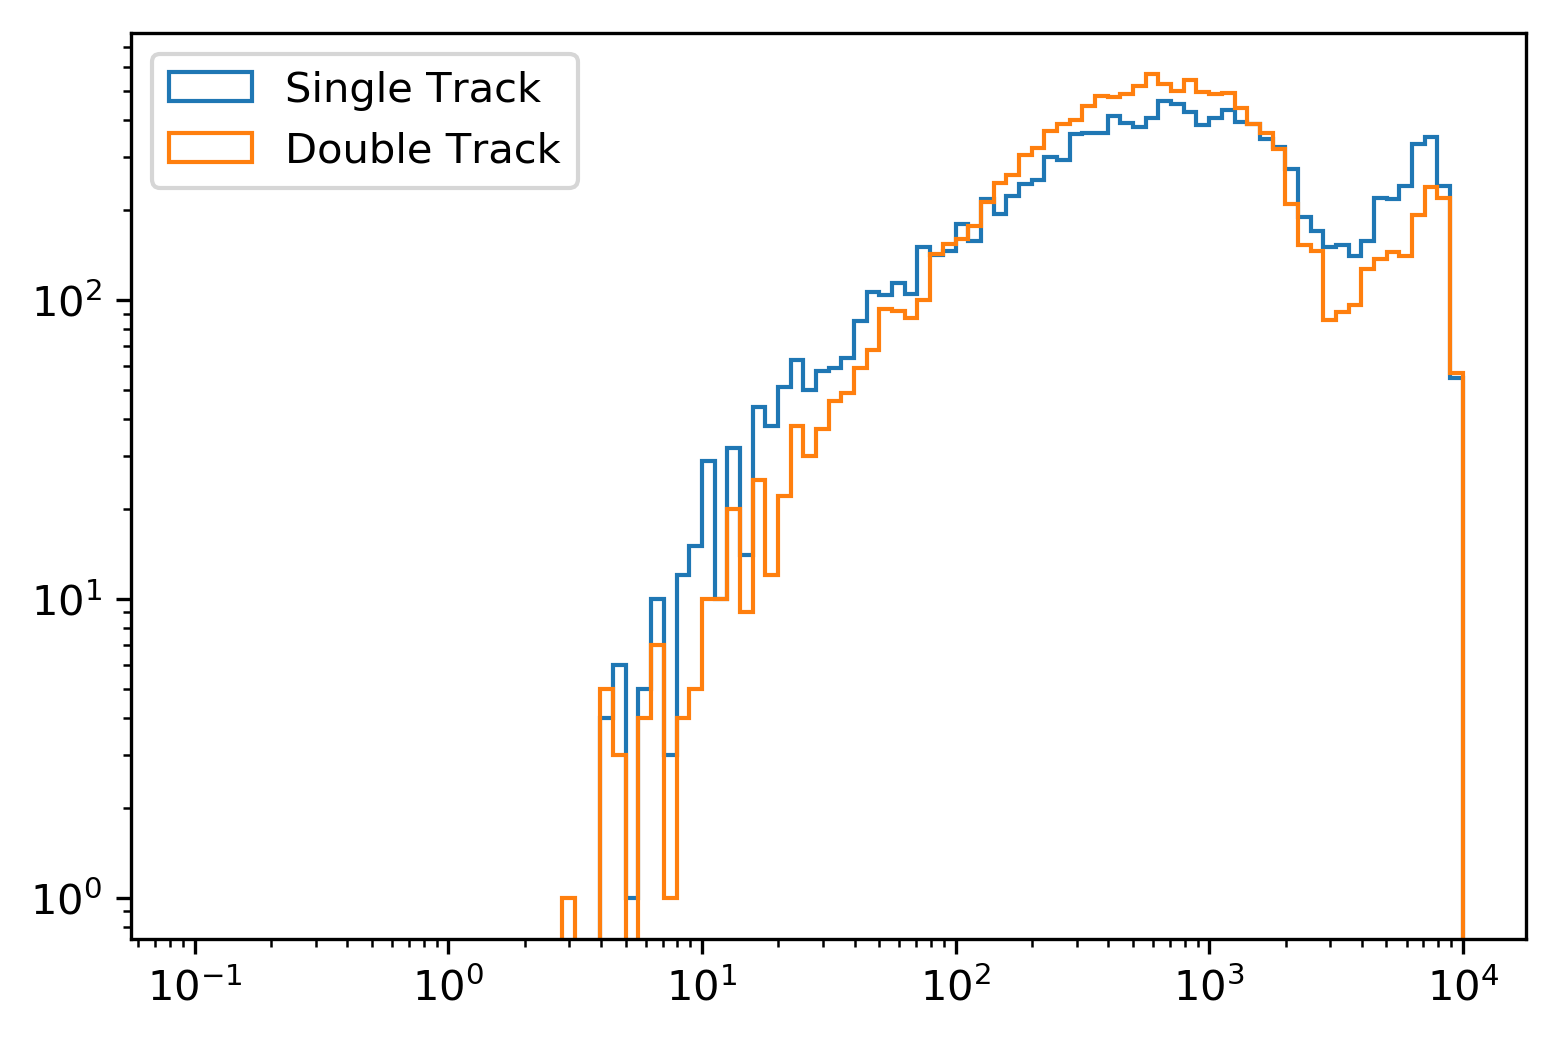

In [16]:
bins=np.logspace(-1, 4, 101)
plt.figure()
plt.hist(strack_p3, bins=bins, histtype='step', label="Single Track")
plt.hist(dtrack_p3, bins=bins, histtype='step', label="Double Track")
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [95]:
print (np.isnan(np.array(strack_p3)))

[False False False ... False False False]


In [70]:
dh_defs = [cv.direct_hits.I3DirectHitsDefinition('def1', -15.*icetray.I3Units.ns, 15.*icetray.I3Units.ns),
          cv.direct_hits.I3DirectHitsDefinition('def2', -15.*icetray.I3Units.ns, 300.*icetray.I3Units.ns),
          cv.direct_hits.I3DirectHitsDefinition('def2', -15.*icetray.I3Units.ns, 3000.*icetray.I3Units.ns)]


strack_p3 = []
for infile in sfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        dh_pulses = cv.direct_hits.get_direct_hits_pulse_map(dh_defs[0], geo, pulses, reco, all_pulses_of_direct_doms=True)
        strack_p3.append(new_pulsetimesmoothness(geo, reco, dh_pulses))

In [71]:
dtrack_p3 = []
for infile in dfiles:
    f = dataio.I3File(infile)
    while f.more():
        f.pop_physics()
        frame = f.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        dh_pulses = cv.direct_hits.get_direct_hits_pulse_map(dh_defs[0], geo, pulses, reco, all_pulses_of_direct_doms=True)
        dtrack_p3.append(new_pulsetimesmoothness(geo, reco, dh_pulses))

In [21]:
def flatten(t):
    return [item for sublist in t for item in sublist]

In [51]:
strack_p3 = flatten(strack_p3)
dtrack_p3 = flatten(dtrack_p3)

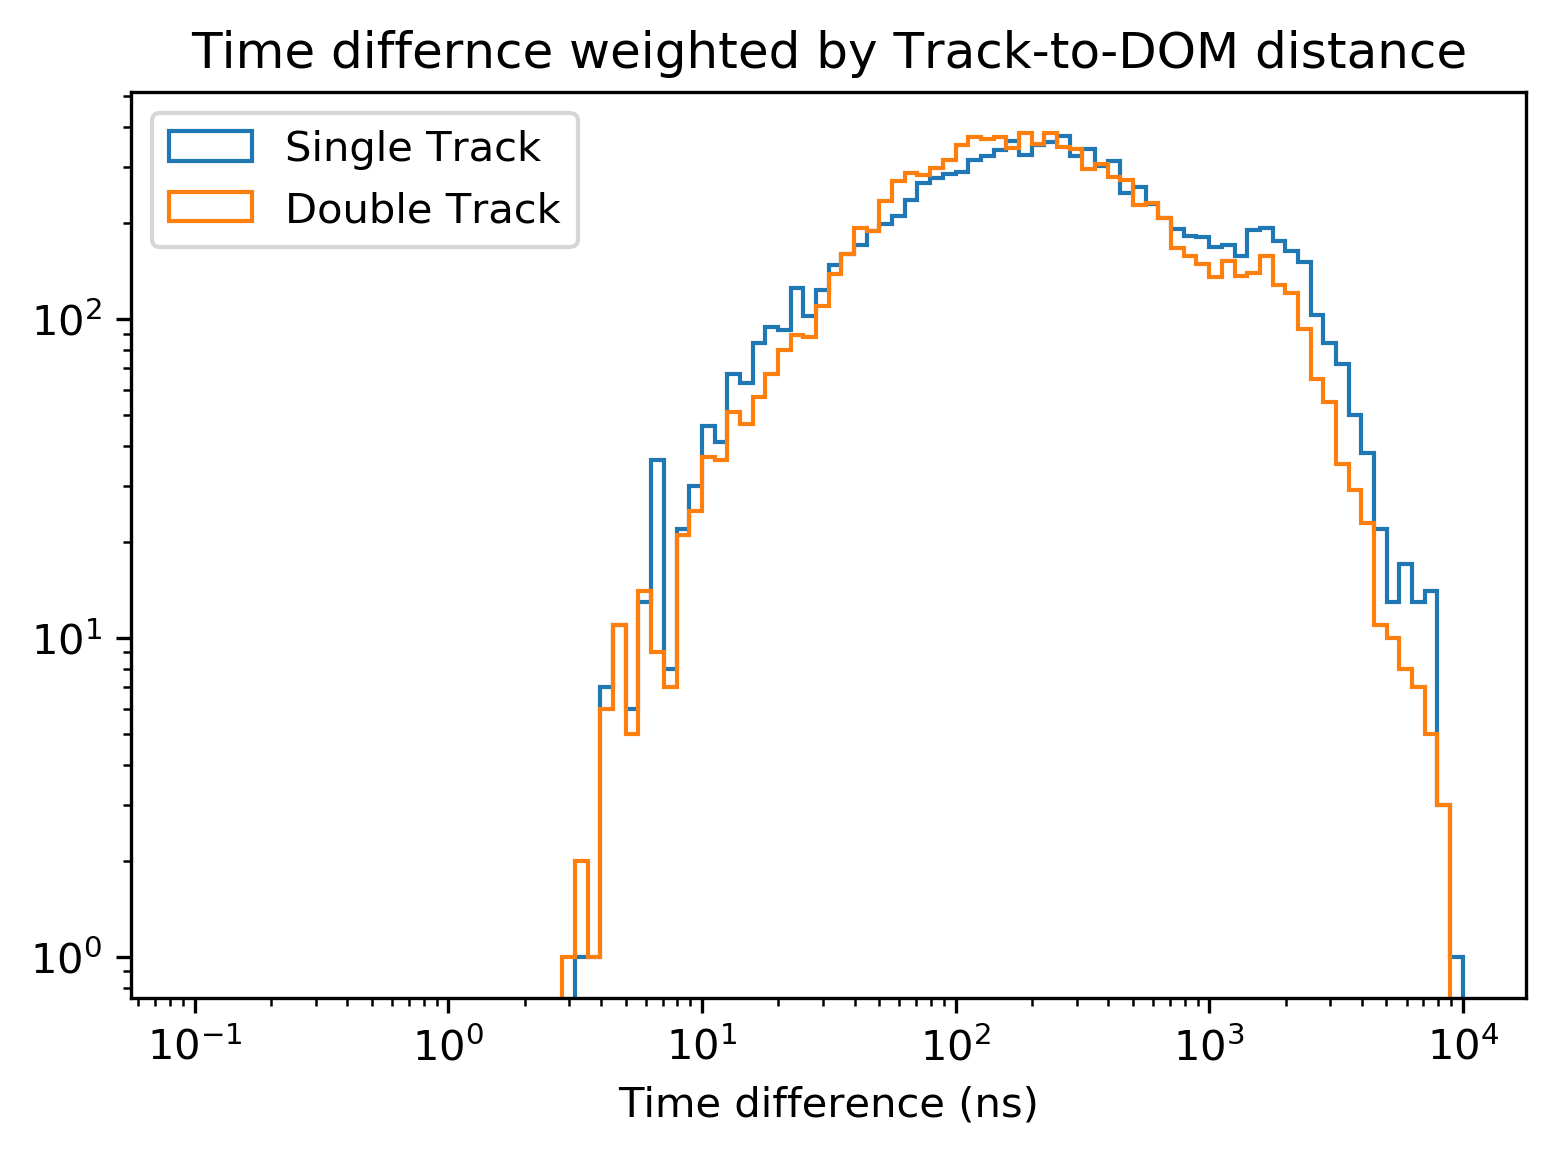

In [72]:
bins=np.logspace(-1, 4, 101)
plt.figure()
plt.hist(strack_p3, bins=bins, histtype='step', label="Single Track")
plt.hist(dtrack_p3, bins=bins, histtype='step', label="Double Track")
plt.xlabel('Time difference (ns)')
#plt.title('Time Difference between 1st and 3rd pulse in a DOM')
plt.title('Time differnce weighted by Track-to-DOM distance')
plt.legend(loc='upper left')
plt.xscale('log')
plt.yscale('log')
plt.show()

### Intensity parameter calculation

In [4]:
calc = phys_services.I3Calculator
domgeo = geo.omgeo

In [5]:
def intensity(reco, pulses, seglen):
    ch_pos = []
    ch_dis = []
    tot_q  = []
    param1=0
    param2=0
    for omkey in pulses.keys():
        dom = domgeo.get(omkey)
        charge = 0
        hits = pulses.get(omkey)
        for i in hits:
            charge+=i.charge
        if charge<=0.5: continue
        #get the charge list
        tot_q.append(charge)
        dist = calc.cherenkov_distance(reco, dom.position)
        #get the cherenkov distance list
        ch_dis.append(dist)
        pos = calc.cherenkov_position(reco, dom.position)
        clen = (pos.x-reco.pos.x)/reco.dir.x
        #get the cherenkov length along the track list
        ch_pos.append(clen)
    #get minimum and maximu cherenkiv lenght along the track
    min_dist = min(ch_pos)
    max_dist = max(ch_pos)
    #choos the points that meets the condition
    iselect = np.where(np.array(ch_pos)<=min_dist+seglen)[0]
    fselect = np.where(np.array(ch_pos)>=max_dist-seglen)[0]
    
    i1_num = np.sum(np.array(tot_q)[iselect]*np.exp(np.array(ch_dis)[iselect]/100.)*np.array(ch_dis)[iselect])
    f1_num = np.sum(np.array(tot_q)[fselect]*np.exp(np.array(ch_dis)[fselect]/100.)*np.array(ch_dis)[fselect])
    
    i1_dum = 0
    f1_dum = 0
    
    i2_num = np.sum(np.array(tot_q)[iselect])
    f2_num = np.sum(np.array(tot_q)[fselect])
    
    i2_dum = 0
    f2_dum = 0
    found_dom = False
    for omkey in domgeo.keys():
        dom = domgeo.get(omkey)
        pos = calc.cherenkov_position(reco, dom.position)
        clen = (pos.x-reco.pos.x)/reco.dir.x
        if min_dist<=clen<=min_dist+seglen:
            found_dom = True
            cdist = calc.cherenkov_distance(reco, dom.position)
            i1_dum +=1
            i2_dum += np.exp(cdist/-100.)/cdist
        if max_dist-seglen<=clen<=max_dist:
            cdist = calc.cherenkov_distance(reco, dom.position)
            f1_dum +=1
            f2_dum += np.exp(cdist/-100.)/cdist
    if i1_dum==0 or f1_dum==0: return None
    return (i1_num/i1_dum, f1_num/f1_dum, i2_num/i2_dum, f2_num/f2_dum)

In [6]:
dintensity1i = np.array([])
dintensity2i = np.array([])

dintensity1f = np.array([])
dintensity2f = np.array([])

for f in dfiles:
    infile = dataio.I3File(f)
    while infile.more():
        infile.pop_physics()
        frame = infile.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        val = intensity(reco, pulses, 100.)
        if val==None: continue
        i1, f1, i2, f2 = val
        dintensity1i = np.append(dintensity1i, i1)
        dintensity1f = np.append(dintensity1f, f1)
        dintensity2i = np.append(dintensity2i, i2)
        dintensity2f = np.append(dintensity2f, f2)

In [7]:
sintensity1i = np.array([])
sintensity2i = np.array([])

sintensity1f = np.array([])
sintensity2f = np.array([])

for f in sfiles:
    infile = dataio.I3File(f)
    while infile.more():
        infile.pop_physics()
        frame = infile.pop_physics()
        if not frame.Has('OnlineL2_SplineMPE'): continue
        reco = frame['OnlineL2_SplineMPE']
        pulses = frame['SRTInIcePulses'].apply(frame)
        val = intensity(reco, pulses, 100.)
        if val==None: continue
        i1, f1, i2, f2 = val
        sintensity1i = np.append(sintensity1i, i1)
        sintensity1f = np.append(sintensity1f, f1)
        sintensity2i = np.append(sintensity2i, i2)
        sintensity2f = np.append(sintensity2f, f2)

In [39]:
print (len(dintensity1i))

0


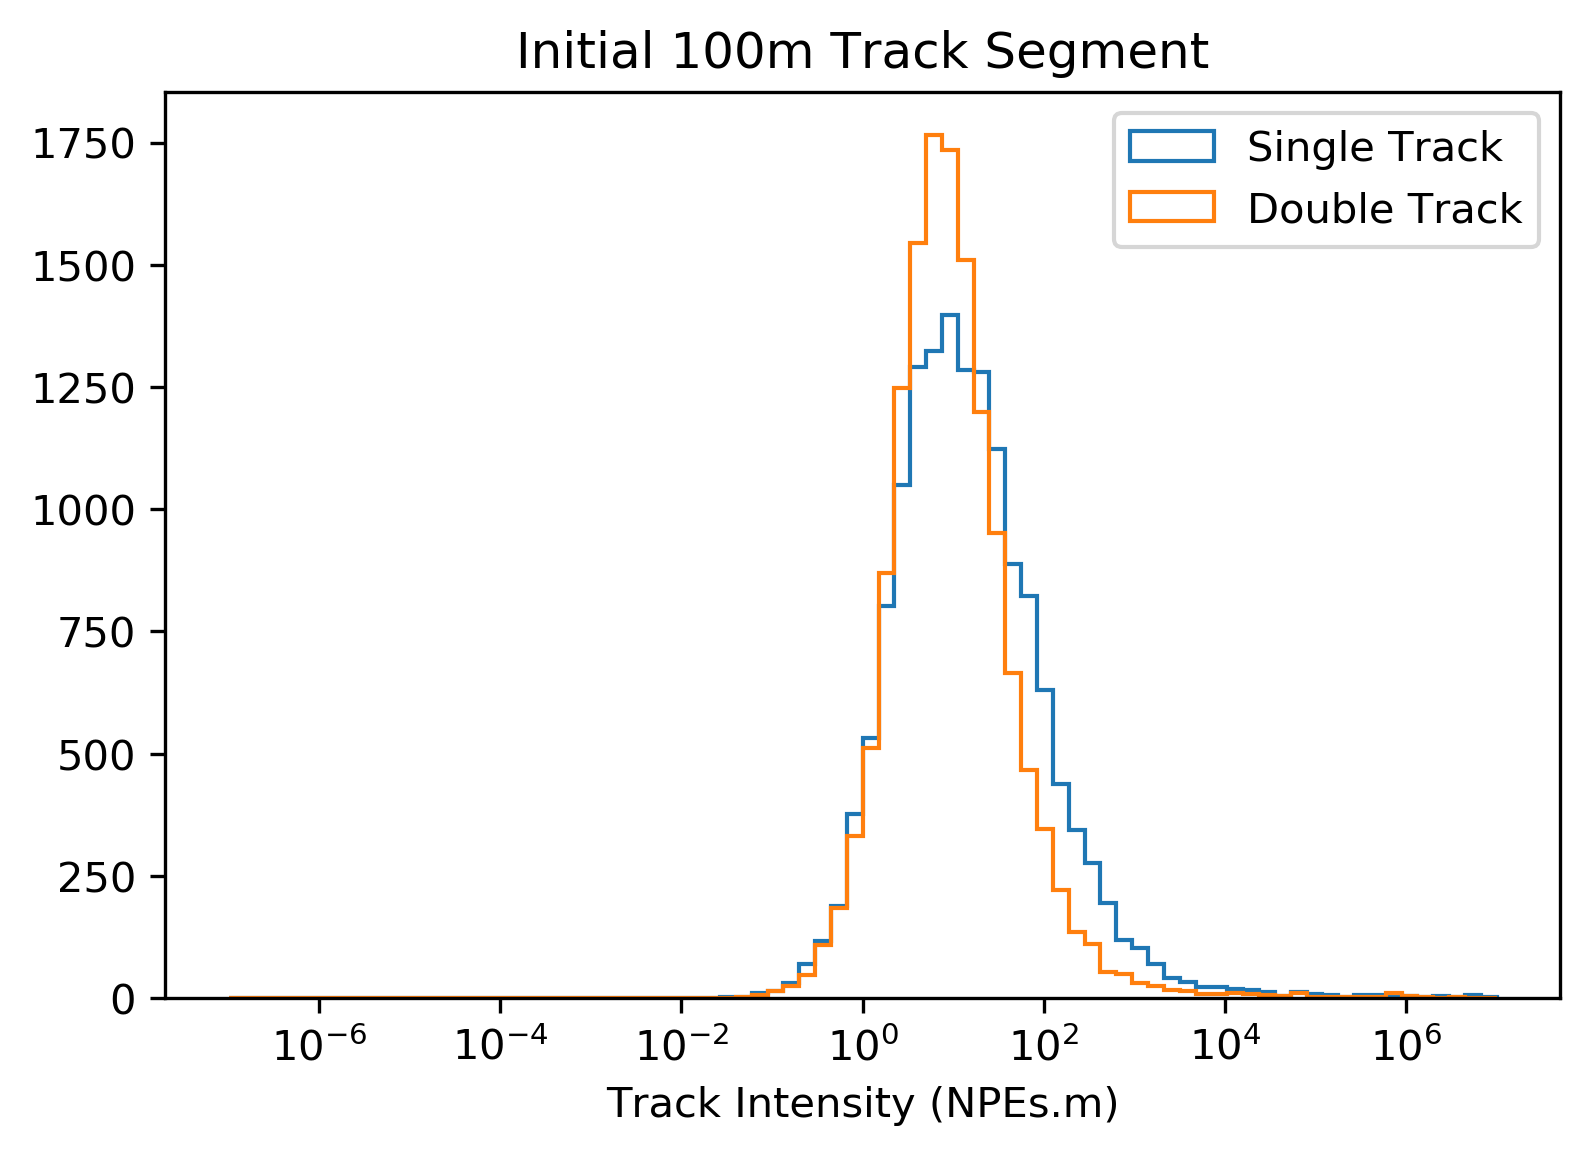

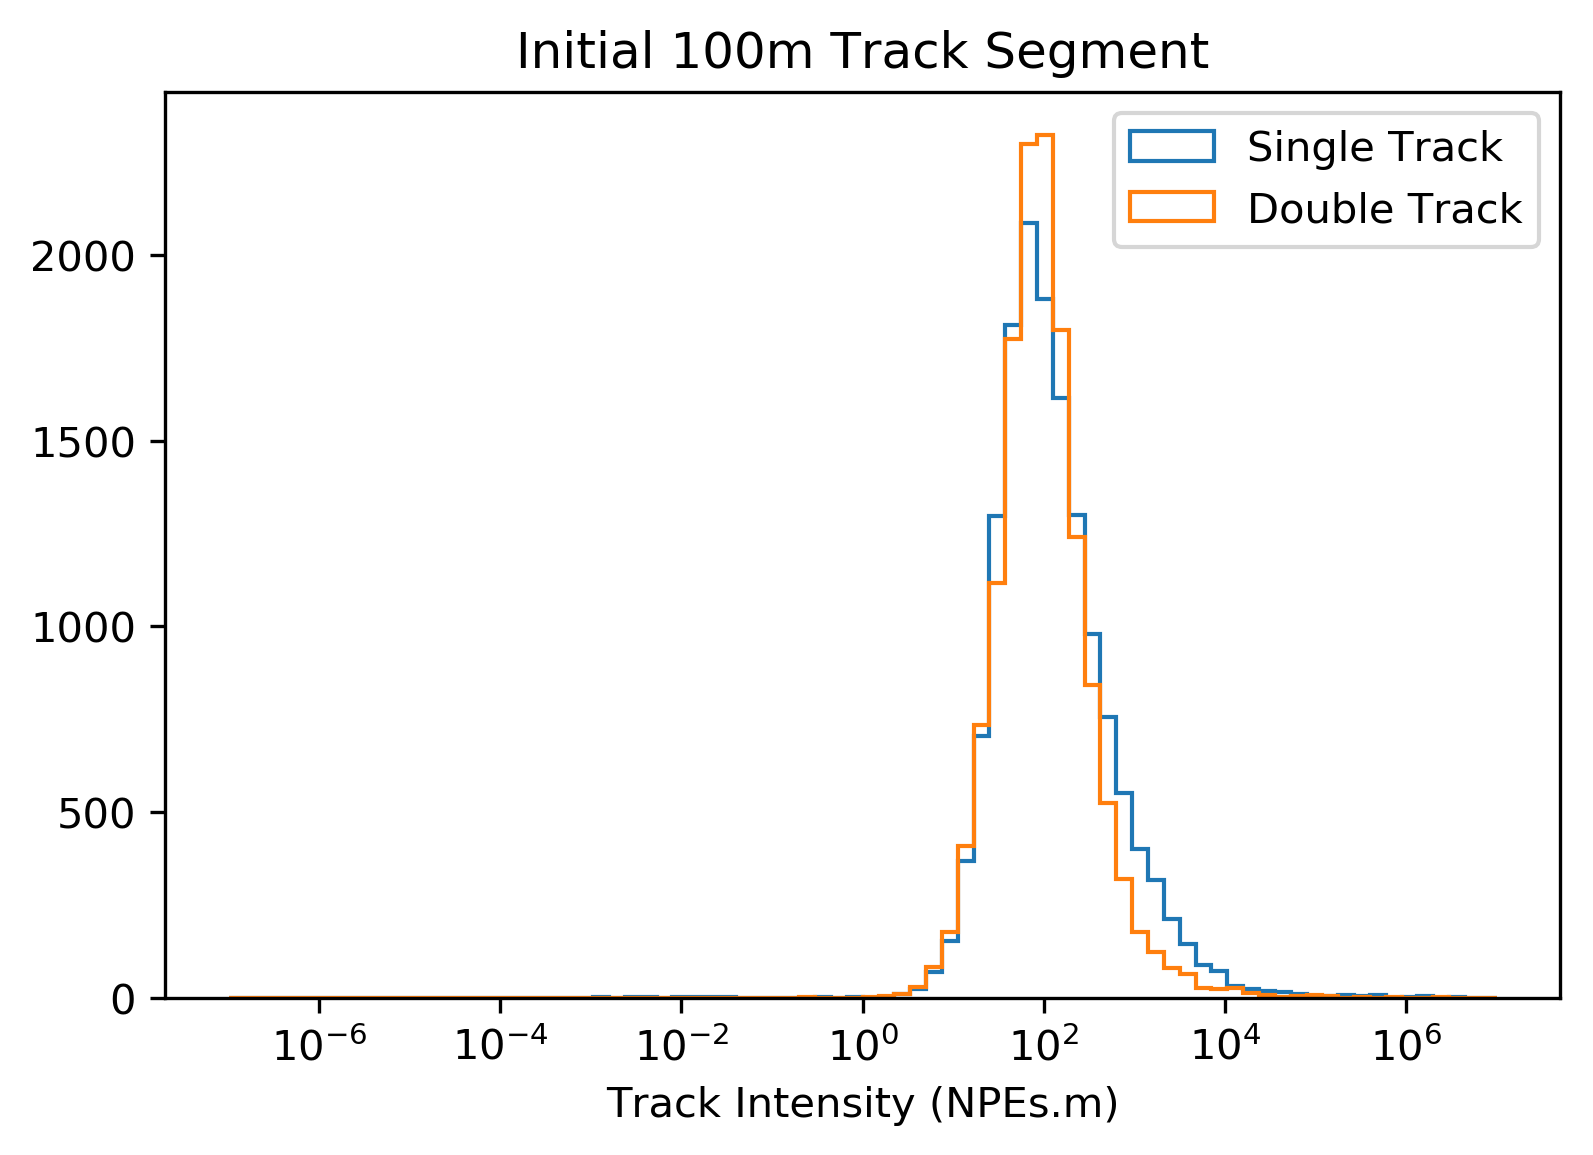

In [9]:
bins=np.logspace(-7,7,81)
plt.figure()
plt.hist(sintensity1i, bins=bins, histtype='step',label='Single Track')
plt.hist(dintensity1i, bins=bins, histtype='step',label='Double Track')
plt.legend()
plt.xlabel('Track Intensity (NPEs.m)')
plt.xscale('log')
plt.title('Initial 100m Track Segment')
plt.show()

bins=np.logspace(-7,7,81)
plt.figure()
plt.hist(sintensity2i, bins=bins, histtype='step',label='Single Track')
plt.hist(dintensity2i, bins=bins, histtype='step',label='Double Track')
plt.legend()
plt.xlabel('Track Intensity (NPEs.m)')
plt.xscale('log')
plt.title('Initial 100m Track Segment')
plt.show()

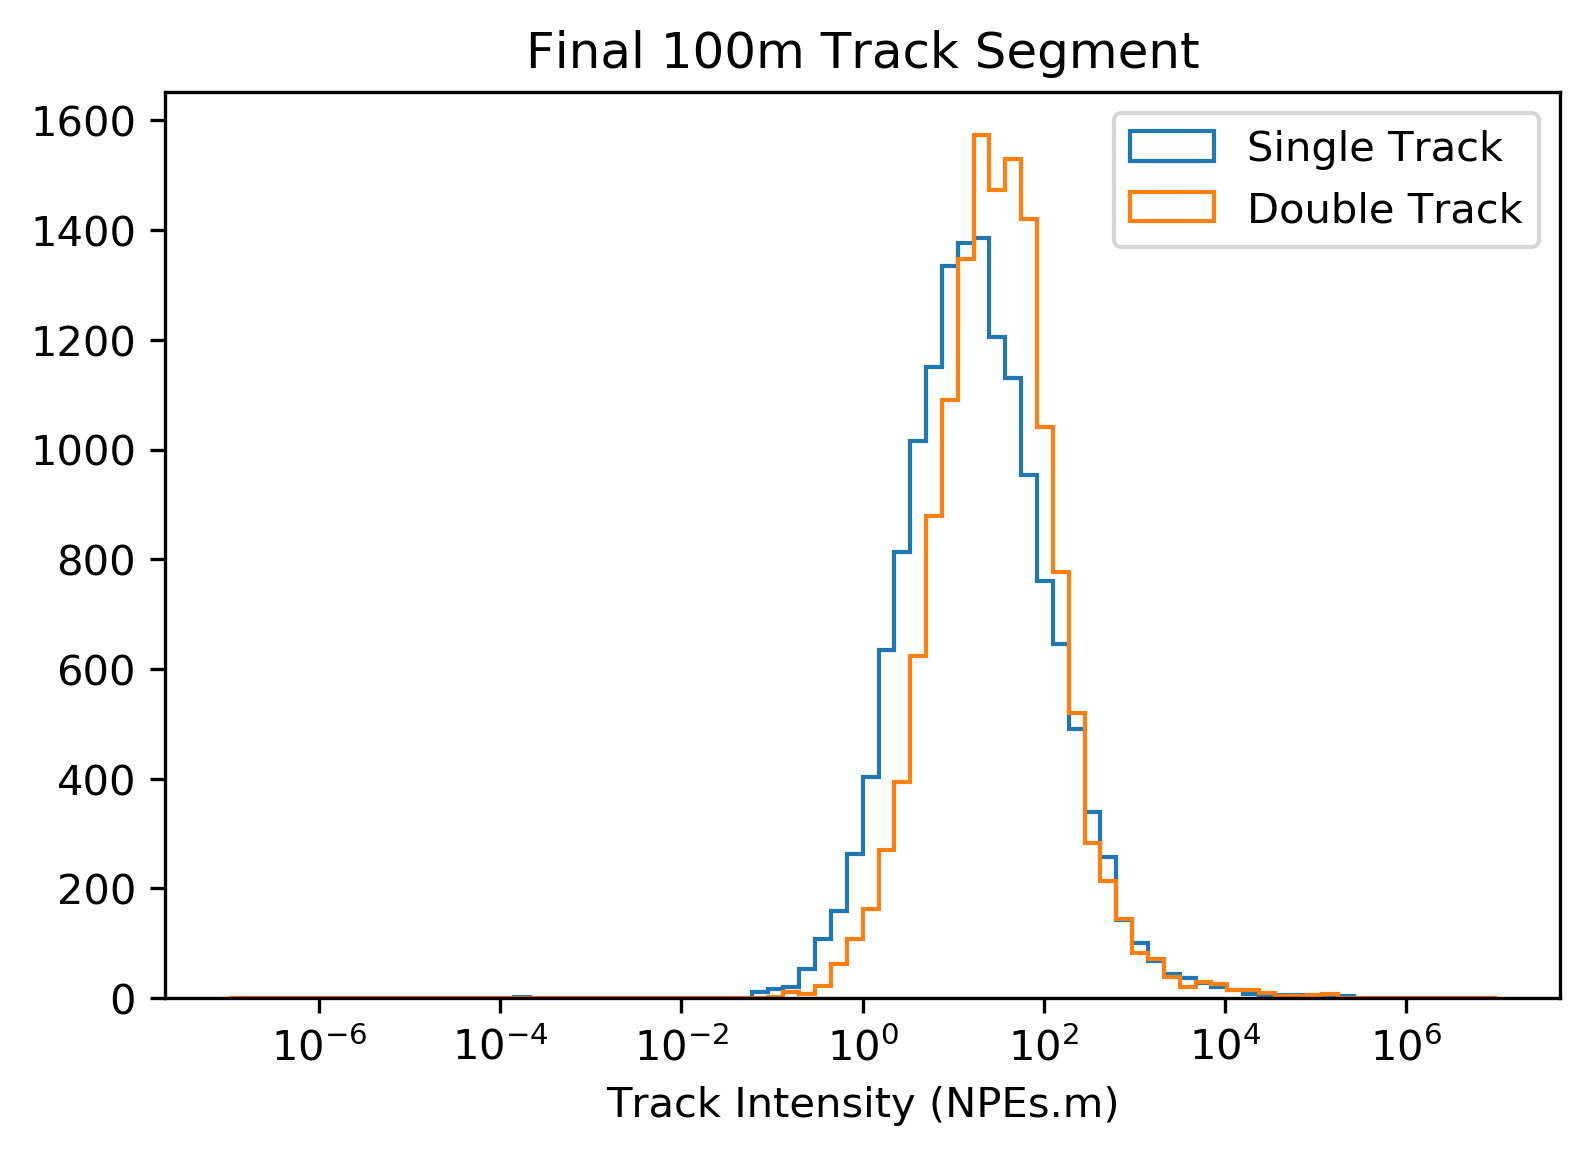

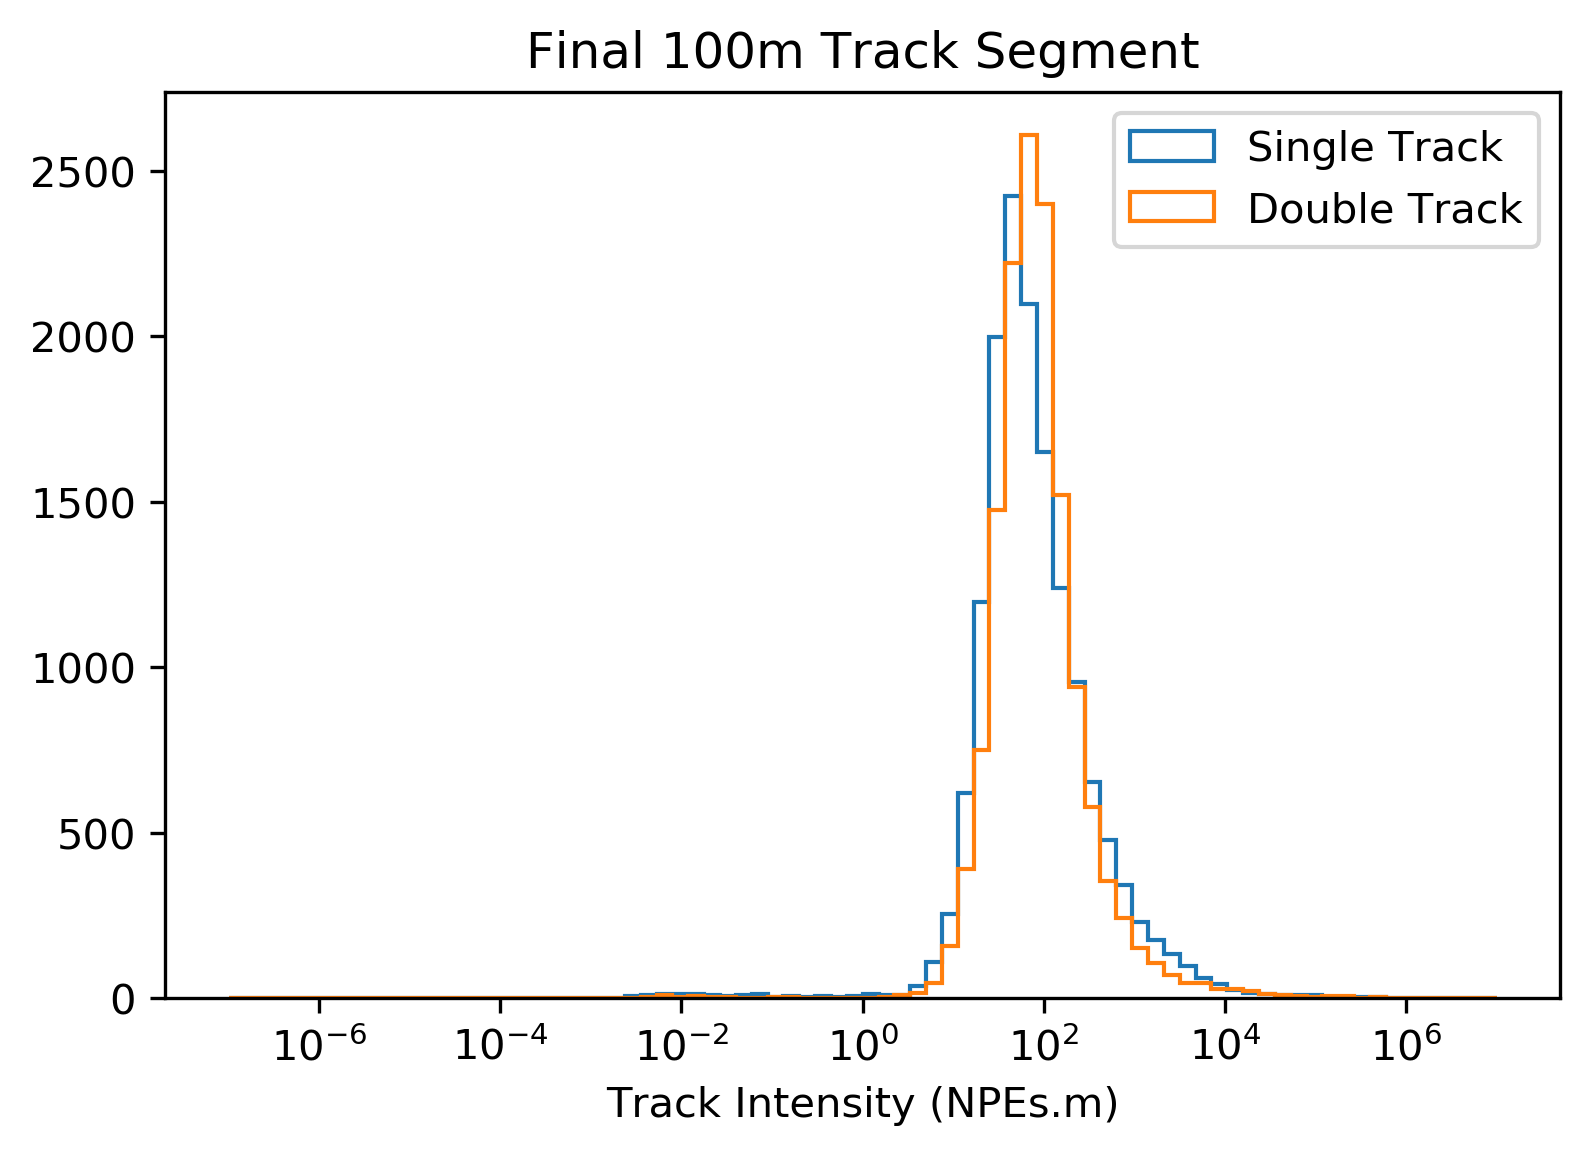

In [11]:
bins=np.logspace(-7,7,81)
plt.figure()
plt.hist(sintensity1f, bins=bins, histtype='step',label='Single Track')
plt.hist(dintensity1f, bins=bins, histtype='step',label='Double Track')
plt.legend()
plt.xlabel('Track Intensity (NPEs.m)')
plt.xscale('log')
plt.title('Final 100m Track Segment')
plt.show()

plt.figure()
plt.hist(sintensity2f, bins=bins, histtype='step',label='Single Track')
plt.hist(dintensity2f, bins=bins, histtype='step',label='Double Track')
plt.legend()
plt.xlabel('Track Intensity (NPEs.m)')
plt.xscale('log')
plt.title('Final 100m Track Segment')
plt.show()